In [68]:
from pydataset import data
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.metrics import explained_variance_score
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

### 1) Load the tips dataset from either pydataset or seaborn

In [39]:
from split_scale import df
df.total_charges = df.total_charges.apply(float)

In [40]:
df.head()

,customer_id,tenure,monthly_charges,total_charges
0,0013-SMEOE,71,109.70,7904.25
1,0014-BMAQU,63,84.65,5377.80
2,0016-QLJIS,65,90.45,5957.90
3,0017-DINOC,54,45.20,2460.55
4,0017-IUDMW,72,116.80,8456.75


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 5 columns):
customer_id        1685 non-null object
tenure             1685 non-null int64
monthly_charges    1685 non-null float64
total_charges      1685 non-null float64
yhat               1685 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 79.0+ KB


### 2) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill. You may follow these steps to do that:

- fit the model to your data, where x = total_bill and y = tip: regr = ols('y ~ x', data=df).fit()

In [49]:
df.head(5)

In [50]:
regr = ols('total_charges ~ tenure + monthly_charges', data= df).fit()
regr

- compute yhat, the predictions of tip using total_bill: df['yhat'] = regr.predict(df.x)

In [75]:
df['yhat'] = regr.predict(df[['tenure', 'monthly_charges']])
df.head(5)

,customer_id,tenure,monthly_charges,total_charges,yhat
0,0013-SMEOE,71,109.70,7904.25,7299.023311
1,0014-BMAQU,63,84.65,5377.80,5431.596095
2,0016-QLJIS,65,90.45,5957.90,5870.174737
3,0017-DINOC,54,45.20,2460.55,2641.746879
4,0017-IUDMW,72,116.80,8456.75,7775.108915


In [60]:
x = df[['tenure', 'monthly_charges']]
y = df[['total_charges']]
yhat = df[['yhat']]

### 4) Write a function, plot_residuals(x, y, dataframe) that takes the feature, the target, and the dataframe as input and returns a residual plot. (hint: seaborn has an easy way to do this!)

In [61]:
def plot_residuals(x,y,dataframe):
    sns.residplot(x,y,data = dataframe)

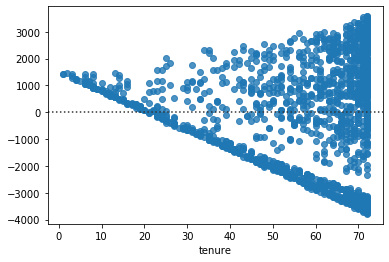

In [63]:
#test
plot_residuals(x['tenure'], y, df)

### 5) Write a function, regression_errors(y, yhat), that takes in y and yhat, returns the sum of squared errors (SSE), explained sum of squares (ESS), total sum of squares (TSS), mean squared error (MSE) and root mean squared error (RMSE).

In [83]:
def regression_errors(y,yhat):
    sse = ((yhat - y)**2).sum()
    ess = ((yhat - y.mean())**2).sum()
    tss = sse + ess
    mse = sse/len(y)
    rmse = math.sqrt(mse)
    return {'sse': sse, 'ess': ess, 'tss': tss, 'mse' : mse, 'rmse' : rmse }

In [84]:
#test
reg_err = regression_errors(df.total_charges, df.yhat)
reg_err

{'sse': 412578026.4639695,
 'ess': 10720920204.449295,
 'tss': 11133498230.913265,
 'mse': 244853.4281685279,
 'rmse': 494.8266647711377}

### 6) Write a function, baseline_mean_errors(y), that takes in your target, y, computes the SSE, MSE & RMSE when yhat is equal to the mean of all y, and returns the error values (SSE, MSE, and RMSE).

In [85]:
def baseline_mean_errors(y):
    yhat = y.mean()
    sse = ((yhat - y)**2).sum()
    mse = sse/len(y)
    rmse = math.sqrt(mse)
    return {'sse': sse, 'mse' : mse, 'rmse' : rmse }

In [87]:
#test
base_err = baseline_mean_errors(df.total_charges)
base_err

{'sse': 11133498230.913254,
 'mse': 6607417.347722999,
 'rmse': 2570.489709709611}

### 7) Write a function, better_than_baseline(SSE), that returns true if your model performs better than the baseline, otherwise false.

In [88]:
def better_than_baseline(y, yhat):
    sse = ((yhat - y)**2).sum()
    base_sse = ((y.mean() - y)**2).sum()
    return sse < base_sse

In [90]:
better_than_baseline(df.total_charges, df.yhat)

True

### 8) Write a function, model_significance(ols_model), that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether the correlation between the model and the tip value are statistically significant.

In [91]:
def model_significance(ols_model):
    r2 = ols_model.rsquared
    r_pval = ols_model.f_pvalue
    
    return {'r2' : r2, 'r_pval' : r_pval}

In [92]:
#test 
model_significance(regr)

{'r2': 0.9629426422938294, 'r_pval': 0.0}

In [93]:
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_charges   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 2.185e+04
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:17:52   Log-Likelihood:                -12845.
No. Observations:                1685   AIC:                         2.570e+04
Df Residuals:                    1682   BIC:                         2.571e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2388.6608     41.062    -58.172      0.000   -2469.199   -2308.122
tenure             41.9776      0.748     56.131      0.000      40.511      43.444
monthly_charges    61.1420      0.382    160.072      0.000      60.393      61.891
==============================================================================
Omnibus:                      300.903   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              810.186
Skew:                          -0.941   Prob(JB):                    1.18e-176
Kurtosis:                       5.828   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""